# **1 CSB352: Data Mining LAB**

Instructor : [Dr. Chandra Prakash]

• For more information visit the class website.

• DATE: 22-Feb-2021

In [3]:
try:
    from google.colab import drive
    %tensorflow_version 2.x
    COLAB = True
    print("Note: using Google CoLab")
except:
    print("Note: not using Google CoLab")
    COLAB = False
# Print your name and Roll No.
# Print the curent time
print("Name: Beeta Samad")
print("Roll No: 181210016")

Note: not using Google CoLab
Name: Beeta Samad
Roll No: 181210016


In [4]:
!pip install heatmapz

In [5]:
!pip install -U scikit-learn

In [7]:
#Importing all the libraries:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import plot_confusion_matrix
from heatmap import heatmap, corrplot

**5.1 PART 8.1: Linear Regression using SKlearn**

CASE STUDY 1: Student Score

In [8]:
#Downloading student_scores.csv:
!gdown --id "1fWufxOG5zNQvWTx6Y0daEw-6QumUCicb"

Downloading...
From: https://drive.google.com/uc?id=1fWufxOG5zNQvWTx6Y0daEw-6QumUCicb
To: D:\Desktop Files\Beeta\College\6th Semester - Study Materials\Data Mining\Lab\Lab8\student_scores.csv

  0%|          | 0.00/214 [00:00<?, ?B/s]
100%|##########| 214/214 [00:00<00:00, 215kB/s]


In [9]:
# reading the csv file
df = pd.read_csv("student_scores.csv")
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [13]:
#Number of rows and columns:
print("Rows:", df.shape[0], ", Columns:", df.shape[1])

Rows: 25 , Columns: 2


In [16]:
#Showing mean, standard deviation, quartiles, max etc:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


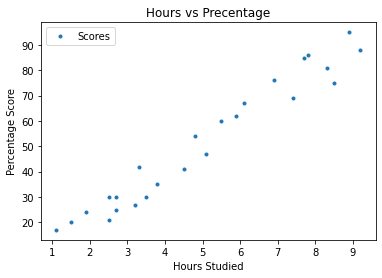

In [20]:
#Plotting the above data:
df.plot(x='Hours',y='Scores',style='.')
plt.title('Hours vs Precentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

In [31]:
#Extracting the data from the dataframe:
x = [[x] for x in list(df["Hours"])]
y = list(df["Scores"])
print("Hours:", x)
print("Scores:", y)

Hours: [[2.5], [5.1], [3.2], [8.5], [3.5], [1.5], [9.2], [5.5], [8.3], [2.7], [7.7], [5.9], [4.5], [3.3], [1.1], [8.9], [2.5], [1.9], [6.1], [7.4], [2.7], [4.8], [3.8], [6.9], [7.8]]
Scores: [21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30, 24, 67, 69, 30, 54, 35, 76, 86]


In [29]:
?train_test_split

In [42]:
#Splitting the dataset into train and test data 
#Test size is 20% of the total dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
print("x_train:", x_train)
print("x_test:", x_test)
print("y_train:", y_train)
print("y_test:", y_test)      

x_train: [[3.8], [1.9], [7.8], [6.9], [1.1], [5.1], [7.7], [3.3], [8.3], [9.2], [6.1], [3.5], [2.7], [5.5], [2.7], [8.5], [2.5], [4.8], [8.9], [4.5]]
x_test: [[1.5], [3.2], [7.4], [2.5], [5.9]]
y_train: [35, 24, 86, 76, 17, 47, 85, 42, 81, 88, 67, 30, 25, 60, 30, 75, 21, 54, 95, 41]
y_test: [20, 27, 69, 30, 62]


In [45]:
regressor = LinearRegression()

#Calculate the optimal values of the intercept and coefficient (b0 and b1)
regressor.fit(x_train,y_train)

print("Intercept:", regressor.intercept_)
print("Coefficiient:", regressor.coef_[0])

Intercept: 2.0181600414346974
Coefficiient: 9.910656480642233


In [46]:
#For testing:
y_pred = regressor.predict(x_test)

In [47]:
df = pd.DataFrame({'Actual':y_test, 'Predicited':y_pred})
df

,Actual,Predicited
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


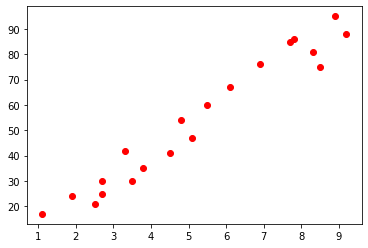

In [48]:
#To see the relationship between the training data values
plt.scatter(x_train, y_train, c='red')
plt.show()

Text(0, 0.5, 'predicted values')

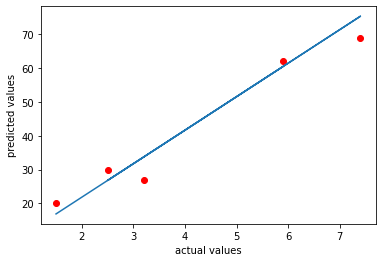

In [49]:
#To see the relationship between the predicted
#brain weight values using scattered graph
plt.plot(x_test,y_pred)
plt.scatter(x_test,y_test,c='red')
plt.xlabel('actual values')
plt.ylabel('predicted values')

In [51]:
#Finding the errors:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.598769307217406
Root Mean Squared Error: 4.647447612100367


**5.2 PART 8.2: Multiple Regression using SKlearn**

When we have more than one vaiable/features in input

CASE STUDY 2: Petrol_consumption

Use Multiple Linear Regression to predict the consumption of petrol given relevant variables are the petrol tax, the per capita, income, the number of miles of paved highway, and the proportion of the population with driver’s licenses.

Dataset There are 48 rows of data. The data include:

I, the index;

A1, the petrol tax;

A2, the per capita income;

A3, the number of miles of paved highway;

A4, the proportion of drivers;

B, the consumption of petrol.

In [53]:
#Downloading the petrol_consumption.csv:
!gdown --id "1EpDWZYnArDJkbGz0elWInBH_sGBoONN0"

Downloading...
From: https://drive.google.com/uc?id=1EpDWZYnArDJkbGz0elWInBH_sGBoONN0
To: D:\Desktop Files\Beeta\College\6th Semester - Study Materials\Data Mining\Lab\Lab8\petrol_consumption.csv

  0%|          | 0.00/1.21k [00:00<?, ?B/s]
100%|##########| 1.21k/1.21k [00:00<00:00, 1.22MB/s]


In [55]:
df=pd.read_csv('petrol_consumption.csv')
df

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.00,3571,1976,0.525,541
1,9.00,4092,1250,0.572,524
2,9.00,3865,1586,0.580,561
3,7.50,4870,2351,0.529,414
4,8.00,4399,431,0.544,410
5,10.00,5342,1333,0.571,457
6,8.00,5319,11868,0.451,344
7,8.00,5126,2138,0.553,467
8,8.00,4447,8577,0.529,464
9,7.00,4512,8507,0.552,498


In [59]:
df.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [58]:
df.corr()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
Petrol_tax,1.000000,0.012665,-0.522130,-0.288037,-0.451280
Average_income,0.012665,1.000000,0.050163,0.157070,-0.244862
Paved_Highways,-0.522130,0.050163,1.000000,-0.064129,0.019042
Population_Driver_licence(%),-0.288037,0.157070,-0.064129,1.000000,0.698965
Petrol_Consumption,-0.451280,-0.244862,0.019042,0.698965,1.000000


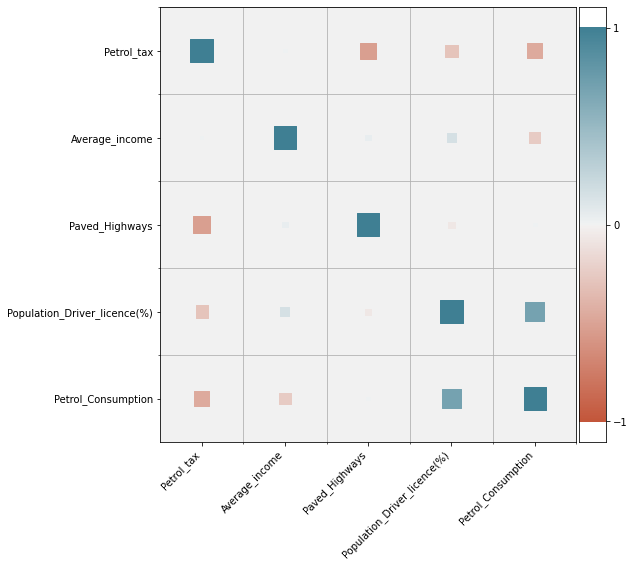

In [62]:
plt.figure(figsize=(8, 8))
corrplot(dataset.corr(), size_scale=500);
#Blue means positive, red means negative. The stronger the color, the largerthe correlation magnitude